# L'attrattore di Lorenz

## Introduzione
L'attrattore di Lorenz è un attrattore che è generato da un sistema di equazioni differenziali del primo ordine che genera un comportamento caotico. Questo comportamento fu scoperto nel 1963 da Edward Norton Lorenz semplificando le equazioni del moto alle derivate parziali che descrivono il movimento di convezione di un fluido.
Le equazioni in forma completa si riferiscono ad un flusso bidimensionale di un fluido con profondità uniforme $H$, sottoposto ad una differenza di temperatura $\Delta T$, sottoposto ad una accelerazione di gravità $g$, con galleggiabilità $\alpha$, diffusività termica $\kappa$ e viscosità cinematica $\nu$. Le equazioni sono:
$$\frac{\partial}{\partial t}(\nabla^2\phi) = \frac{\partial\psi}{\partial z} \frac{\partial}{\partial z}(\nabla^2\psi)-\frac{\partial\psi}{\partial x}\frac{\partial}{\partial z}(\nabla^2\psi)+\nu\nabla^2(\nabla^2\psi)+g\alpha\frac{dT}{dx}$$
$$\frac{\partial T}{\partial t} = \frac{\partial T}{\partial z}\frac{\partial\psi}{\partial x}-\frac{\partial\theta}{\partial x}\frac{\partial\psi}{\partial z}+\kappa\nabla^2 T+\frac{\Delta T}{H}\frac{\partial\psi}{\partial x}$$
Dove $\psi$ è una funzione di flusso, definita in modo che le componenti $u=(u, w)$ del moto del fluido siano $$u=\frac{\partial\psi}{\partial z}\qquad w=-\frac{\partial\psi}{\partial x}$$

### La soluzione di Lorenz
Lorenz era alla ricerca di un insieme di equazioni differenziali ordinarie tridimensionale che potesse modellizzare alcuni dei comportamenti non predicibili associati convenzionalmente con la meteorologia. La derivazione originale delle equazioni può essere descritta come segue: Una cella fluida bidimensionale è riscaldata dal basso e raffreddata dall'alto, questo comportamento viene modellato da equazioni differenziali alle derivate parziali. Le componenti che generano le tre equazioni rappresentano tre grandezze diverse: la variabile $x$ misura il tasso di "rotazione convettiva", la variabile $y$ misura la variazione orizzontale di temperatura e $z$ quella verticale. Le equazioni sono:
$$\frac{dx}{dt}=\sigma(y-x)\qquad\frac{dy}{dt}=x(\rho-z)-y\qquad\frac{dz}{dt}=xy-\beta z \tag{1}$$  I tre parametri $\sigma$, $\rho$, $\beta$ sono rispettivamente proporzionali al numero di Prandtl, al numero di Raylegh e ad alcune proporzioni fisiche della regione considerata. Sono tutte considerate positive.<br/>**Una descrizione del problema fisico e la sua soluzione è riportata in *Appendice 1***.<br/>
Le equazioni di Lorenz specificano, per ogni valore dei parametri, un campo vettoriale $f: \mathbb{R}^3\rightarrow\mathbb{R}^3$ che non dipende dal tempo. Questo campo vettoriale determina un flusso $\phi_t(x)$ dove $t\in\mathbb{R}$ e $x\in\mathbb{R}^3$.<br/>
Le equazioni di Lorenz sono solitamente scritte nella forma $$\frac{d\phi}{dt}=f(\phi_t(x))$$
Il flusso $\phi$ soddisfa le condizioni: $\phi_0(x)=x, \quad \phi_s(\phi_t(x))=\phi_{s+t}(x)$ e $\phi$ è continuo sia rispetto a $x$, sia rispetto a $t$.<br/>
C'è da dire che le equazioni di Lorenz non rappresentano un modello realistico del problema fluidodinamico se il parmetro $\rho$ è lontano dal valore $1$. Dato il grande interesse generato dalle equazioni di Lorenz, si sono iniziati a cercare problemi reali che potevano essere modellizati accuratamente con equazioni di Lorenz e $\rho$ molto maggiore di $1$. Haken (1975) ha derivato le equazioni da un problema riguardante irregolarità nei laser; Malkus, Yorke e Yorke (1978) hanno trovato le equazioni studiando un problema di convezione in una regione toroidale. Malkus ha costruito una ruota mossa dall'acqua che si comporta in modo simile al sistema di Lorenz e dalla quale si possono derivare le equazioni del moto, corrispondenti a quelle di Lorenz. <br/>
Qua sotto è rappresentata la traiettoria con i classici parametri per il comportamento caotico $\sigma=10$, $\beta=\frac{8}{3}$ e $\rho=28$ (Fig.1):

Matplotlib is building the font cache; this may take a moment.


Text(0.5, 0.92, 'Attrattore di Lorenz (Fig. 1)')

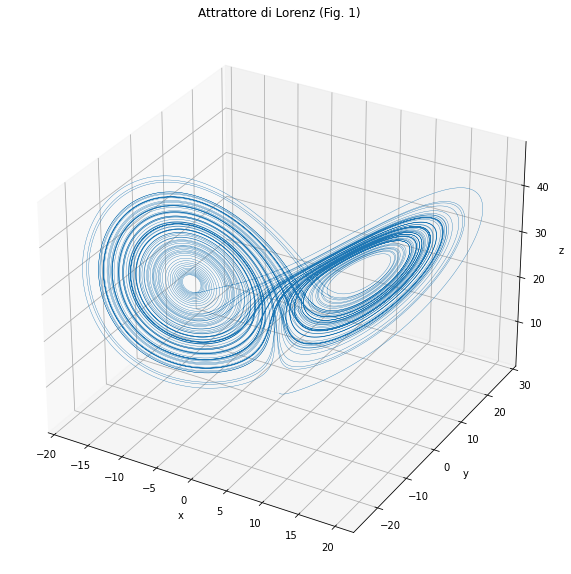

In [1]:
#Implementazione dell'attrattore di Lorenz con parametri fissati
#1. IMPORTAZIONE DELLE LIBRERIE NECESSARIE
import numpy as np
import matplotlib.pyplot as plt

#2. DEFINIZIONE DELLA FUNZIONE CHE RESTITUISCE I VALORI DELLE DERIVATE PARZIALI
def lorenz_dp(x, y, z, s=10, r=28, b=2.667):
    '''
    Dati:
        x, y, z: punto nello spazio tridimensionale
        s, r, b: parametri che definiscono l'attrattore
    Restituisce:
        x_dp, y_dp, z_dp: derivate parziali dell'attrattore al punto x, y, z
    '''
    
    x_dp = s*(y - x)
    y_dp = r*x - y - x*z
    z_dp = x*y - b*z
    return x_dp, y_dp, z_dp

#3. DEFINIZIONE DELL'INTERVALLO dt E DEL NUMERO DI REITERAZIONI DA FARE
dt = 0.001
steps_n = 100000

#4. DEFINIZIONE DELL'INSIEME DEI PUNTI CALCOLATI E VALORI INIZIALI
xs = np.empty(steps_n + 1) #l'array contiene il valore calcolato in ogni passo e l'iniziale
ys = np.empty(steps_n + 1)
zs = np.empty(steps_n + 1)
xs[0], ys[0], zs[0] = (0., 1., 1.05)

#5. CALCOLO VALORI PUNTO SUCCESSIVO ATTRAVERSO LE DERIVATE
for i in range(steps_n):
    x_dp, y_dp, z_dp = lorenz_dp(xs[i], ys[i], zs[i])
    xs[i + 1] = xs[i] + (x_dp*dt)
    ys[i + 1] = ys[i] + (y_dp*dt)
    zs[i + 1] = zs[i] + (z_dp*dt)

#6. GRAFICO DEI VALORI
fig = plt.figure(figsize=[10,10])
ax = fig.gca(projection='3d')

ax.plot(xs, ys, zs, linewidth=0.35)
ax.set_xlabel("x")
ax.set_ylabel("y")
ax.set_zlabel("z")
ax.set_title("Attrattore di Lorenz (Fig. 1)")

Si può notare dalla Fig. 1 sopra che la traiettoria sembra avere proprietà che si potrebbero quasi definire come "turbolente":
<ol>
<li>La traiettoria non è periodica
<li>La figura non sembra mostrare un fenomeno transitorio. Per quanto continuiamo l'integrazione numerica, la traiettoria continuerà a girare attorno, su un lobo e sull'altro
<li>La forma generale della figura non dipende in nessun modo dalla nostra scelta di condizioni iniziali (quindi anche scegliendole per evitare un eventuale transitorio si avrebbe comunque la stessa forma) o dalla nostra scelta del metodo di integrazione
<li>I dettagli della figura dipendono pesantemente da entrambi i fattori menzionati nel punto 3. La sequenza esatta di rivoluzioni che vengono effettuate dalla traiettoria è estremamente sensibile a cambiamenti di condizioni iniziali e metodo di integrazione scelto. Conseguenza di ciò è quella di non poter prevedere ciò che accadrà se non a brevissimo tempo.
<ol/>


#### Alcune semplici proprietà delle equazioni di Lorenz
<li> ***Simmetria***:<br/>
Le equazioni sono dotate di una simmetria $(x, y, z)\rightarrow(-x, -y, z)$ naturale che persiste per tutti i valori dei parametri.<br/><br/>
<li> ***Asse $z$***:<br/>
L'asse $z$ ($x=y=0$) è invariante. Tutte le traiettorie che iniziano sull'asse $z$ rimangono su di esso e tendono verso l'origine. Inoltre, tutte le traiettorie che ruotano attorno a quest'asse lo fanno in senso orario quando viste da sopra il piano. Questo perché se $x=0$ allora $\frac{dx}{dt}>0$ quando $y>0$ e $\frac{dx}{dt}<0$ quando $y<0$. Possiamo descrivere parzialmente le orbite periodiche del sistema contando il numero di rotazioni attorno all'asse $z$. Questa descrizione non varia con il variare dei parametri, perché le stesse orbite periodiche continuano ad esistere.<br/><br/>
<li> ***Esistenza di un insieme attrattore limitato di volume zero***:<br/>
La divergenza del flusso è negativa: $$\frac{\partial\dot{x}}{\partial x}+\frac{\partial\dot{y}}{\partial y}+\frac{\partial\dot{z}}{\partial z} = \frac{\partial}{\partial x}(\sigma y-\sigma x)+\frac{\partial}{\partial y}(-xz+\rho x-y)+\frac{\partial}{\partial z}(xy-\beta z) = -(\sigma+\beta+1)$$
e fa in modo che un elemento di volume $V$ venga contrtto dal flusso in un elemento di volume $Ve^{-(\sigma+\beta+1)t}$ in un tempo $t$. Questa osservazione riduce i tipi di oggetti che possiamo trovare nel sistema di Lorenz: *punti di equilibrio stabili* verso i quali tendono tutte le traiettorie vicine, *punti di equilibrio instabili* da cui divergono tutte le traiettorie vicine e, infine, *punti di equilibrio non-stabili*, che non sono né stabili né instabili. Quindi, la natura dissipativa del flusso implica che non ci possono essere orbite o punti di equilibrio instabili in quanto, se così fosse, si avrebbero zone di espansione del volume da parte del flusso (e quindi a divergenza positiva).<br/>
Si può mostrare (Lorenz (1963)) che esiste un elissoide limitato $E\subset\mathbb{R}^3$ in cui ogni traiettoria entra definitivamente. Considerando la funzione di Ljapunov *(Def. 5)* $V = x^2+\sigma y^2+\sigma z^2$ si mostra che l'origine $(0,0,0)$ è un punto di equilibrio globalmente stabile. Per ogni valore dei parametri, l'esistenza dell'elissoide limitato $E$ e la negatività della divergenza mostrano che esiste un insieme limitato con volume nullo dentro $E$ verso cui tendono tutte le traiettorie.<br/><br/>
<li> ***Punti fissi***:<br/>
L'origine è un punto fisso per ogni valore dei parametri. Se $0<\rho<1$ sappiamo che è stabile e globalmente attrattivo *(punto precedente)*. Quando $\rho=1$ si ha una biforcazione semplice e, per $\rho>1$ ci sono altri due punti fissi che sono: $$C_{1,2}=\left(\pm\sqrt{\beta(\rho-1)}, \pm\sqrt{\beta(\rho-1)}, \rho-1\right)$$
Analizzo ora la stabilità dei punti fissi tramite il segno degli autovalori dello Jacobiano, che vale: $$J = \begin{bmatrix} \frac{\partial \dot{x}}{\partial{x}} & \frac{\partial \dot{x}}{\partial y} &\frac{\partial \dot{x}}{\partial z} \\ \frac{\partial \dot{y}}{\partial{x}} & \frac{\partial \dot{y}}{\partial y} &\frac{\partial \dot{y}}{\partial z} \\ \frac{\partial \dot{z}}{\partial{x}} & \frac{\partial \dot{z}}{\partial y} &\frac{\partial \dot{z}}{\partial z} \end{bmatrix} = \begin{bmatrix} -\sigma & \sigma & 0 \\ \rho-z & -1 & -x \\ y & x &-\beta \end{bmatrix}$$
Partendo dal punto $(0,0,0)$ lo Jacobiano risulta:
$$J = \begin{bmatrix} -\sigma & \sigma & 0 \\ \rho & -1 & 0 \\ 0 & 0 &-\beta \end{bmatrix}$$
da cui l'equazione caratteristica $\lambda^3+\lambda^2(\beta+\sigma+1)+\lambda(\beta+\beta\sigma-\rho\sigma+\sigma)+\beta\sigma(1-\rho)=0$, trovo quindi tre autovalori: $$\lambda_{1,2} = \frac{1}{2}\left[-\sigma-1\pm\sqrt{(\sigma-1)^2+4\sigma\rho}\right]\qquad \lambda_3 = -\beta$$
Ho quindi che $\lambda_1>0,\quad \lambda_{2,3}<0$. Nel caso di $\rho>1$ l'origine è un punto di equilibrio non stabile, abbiamo $-\lambda_2>\lambda_1>-\lambda_3$, che ci fornisce $\rho>1+\beta\frac{\sigma+\beta+1}{\sigma}$. Nel caso di $\sigma = 10, \quad \beta=\frac{8}{3}$, questa condizione diventa $\rho>\frac{209}{45}$.<br/>
Passando invece al caso dei punti $C_1,\quad C_2$, possiamo calcolare gli autovalori della matrice Jacobiana, una volta sostituite le coordinate dei punti. L'equazione caratteristica risulta: $$\lambda^3+\lambda^2(\sigma+\beta+1)+\lambda\beta(\sigma+\rho)+2\sigma\beta(\rho-1)=0\tag{2}$$
Le condizioni per le quali tutti gli autovalori sono reali sono complicate e non importanti. Basta dire che tutte e tre le radici sono reali quando $\rho$ è molto vicino ad $1$ ma, quando $\sigma = 10$, $\beta = \frac{8}{3}$ si ha una radice radice reale e una coppia di radici complesse coniugate quando $\rho>1.346$ (Sparrow 1982). Ciò che è importante è che se $$\rho<\frac{\sigma(\sigma+\beta+3)}{\sigma-\beta-1}$$ tutte e tre le radici hanno la parte reale negativa. Questo implica che quando i parametri sono quelli indicati precedentemente, i punti fissi $C_1$ e $C_2$ sono stabili per $1<\rho<\rho_c$ dove $\rho_c$ è un valore critico di $\rho$ che vale $\rho_c=\frac{470}{19}$.<br/>
Nel caso in cui $\rho>\rho_c$ le radici complesse dell'equazione caratteristica $(2)$ hanno parte reale positiva e i due punti $C_{1,2}$ sono non-stabili. La radice reale è negativa $\forall \rho$. <br/>
Per il valore $\rho=\rho_c$, dato che gli autovlori attraversano l'asse complesso, si ha una biforcazione di Hopf *(Def. 6)* nella quale i punti $C_{1,2}$ perdono la loro stabilità. In questo caso la biforcazione è subcritica, poiché la stabilità viene persa assorbendo una orbita periodica non-stabile. (Marsden e McCracken, 1976)<br/>
Sembra che la biforcazione resti subcritica per tutti i valori di $\sigma$ e $\beta$ per i quali la biforcazione avviene con $\rho>0$. (Hassard et al., 1981).<br/>
<li> ***In sintesi***:<br/>
Schematizziamo i risultati di quest'ultima sezione:<br>
<ol>
<li>Se $0<\rho<1$ l'origine è globalmente stabile,
<li>Se $\rho>1$ l'origine è non-stbile e lo Jacobiano ha due autovlori reali negativi e uno positivo,
<li>Se $1<\rho<\frac{470}{19}$ i punti $C_{1,2}$ sono stabili. Tutti e tre gli autovalori hanno prte reale negativa,
<li>Se $\rho>\frac{470}{19}$ $C_{1,2}$ sono non-stabili. Si ha un autovalore reale negativo e una coppia di complessi coniugati con parte reale positiva.
<span style="font-family:Calibri; font-size=11pt"></span>

## Comportamento delle orbite
Quando $\rho>1$ c'è una superficie bidimensionale di valori iniziali in $\mathbb{R}^3$ le quali traiettorie tendono all'origine. Questa superficie è chiamata varietà stabile dell'origine. Vicino all'origine sappiamo che questa superficie corrisponde al piano associato ai due autovalori negativi dello jacobiano.<br/>
Quando $\rho$ è poco maggiore dell'unità, la varietà stabile dell'origine divide $\mathbb{R}^3$ in due metà in modo abbastanza semplice. Le triettorie che inziano in un semispazio tendono a $C_1$ e quelle che iniziano nell'altro semispazio tendono a $C_2$. Ovviamente, le traiettorie che iniziano sulla varietà stabile dell'origine tendono all'origine stessa. Per un valore di $\rho$ più grande, $\rho'$, approssimativamente $13,926$ sembra che il flusso subisca un importante cambio di comportamento. Con l'aumentare di $\rho$ verso il valore di $\rho'$ le spirali formate dalle traiettorie che iniziano sull avarietà instabile dell'origine (varietà unidimensionale associata all'autovalore positivo nell'origine) diventano sempre più ampie. Per $\rho>\rho'$ le traiettorie cambiano spirale e l'attrazione cambia verso l'altro punto stazionario $C$.

Segue un'implementazione in Python del sistema di Lorenz con due condizioni iniziali diverse: $(0,1,1.05), \quad (0,1,1.0500001)$ rispettivamente in blu e in rosso:

Text(0.5, 0.92, 'Le due traiettorie iniziano a divergere (Fig. 3)')

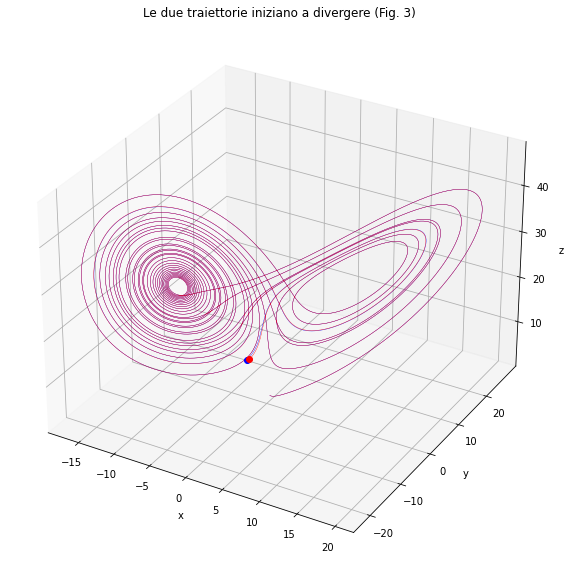

In [35]:
#1. IMPORTAZIONE LIBRERIE
import numpy as np
import matplotlib.pyplot as plt

#2. DEFINIZIONE DELLA FUNZIONE CHE RESTITUISCE I VALORI DELLE DERIVATE PARZIALI
def lorenz_dp(x, y, z, s=10, r=28, b=2.667):
    '''
    Dati:
        x, y, z: punto nello spazio tridimensionale
        s, r, b: parametri che definiscono l'attrattore
    Restituisce:
        x_dp, y_dp, z_dp: derivate parziali dell'attrattore al punto x, y, z
    '''
    
    x_dp = s*(y - x)
    y_dp = r*x - y - x*z
    z_dp = x*y - b*z
    return x_dp, y_dp, z_dp

#3. DEFINIZIONE DELL'INTERVALLO dt E DEL NUMERO DI REITERAZIONI DA FARE
dt = 0.001
steps_n = 25000

#4. DEFINIZIONE DELL'INSIEME DEI PUNTI CALCOLATI E VALORI INIZIALI
xs_1 = np.empty(steps_n + 1) #l'array contiene il valore calcolato in ogni passo e l'iniziale
ys_1 = np.empty(steps_n + 1)
zs_1 = np.empty(steps_n + 1)
xs_1[0], ys_1[0], zs_1[0] = (0., 1., 1.05)

xs_2 = np.empty(steps_n + 1)
ys_2 = np.empty(steps_n + 1)
zs_2 = np.empty(steps_n + 1)
xs_2[0], ys_2[0], zs_2[0] = (0., 1., 1.0500001)

#5. CALCOLO VALORI PUNTO SUCCESSIVO ATTRAVERSO LE DERIVATE
for i in range(steps_n):
    x_dp_1, y_dp_1, z_dp_1 = lorenz_dp(xs_1[i], ys_1[i], zs_1[i])
    xs_1[i + 1] = xs_1[i] + (x_dp_1*dt)
    ys_1[i + 1] = ys_1[i] + (y_dp_1*dt)
    zs_1[i + 1] = zs_1[i] + (z_dp_1*dt)

    x_dp_2, y_dp_2, z_dp_2 = lorenz_dp(xs_2[i], ys_2[i], zs_2[i])
    xs_2[i + 1] = xs_2[i] + (x_dp_2*dt)
    ys_2[i + 1] = ys_2[i] + (y_dp_2*dt)
    zs_2[i + 1] = zs_2[i] + (z_dp_2*dt)

#6. GRAFICO DEI VALORI
fig = plt.figure(figsize=[10,10])
ax = fig.gca(projection='3d')

ax.plot(xs_1, ys_1, zs_1, linewidth=0.35, color="blue")
ax.plot(xs_2, ys_2, zs_2, linewidth=0.35, color="red")
ax.plot(xs_1[steps_n], ys_1[steps_n], zs_1[steps_n], 'ro', color="blue")
ax.plot(xs_2[steps_n], ys_2[steps_n], zs_2[steps_n], 'ro', color="red")
ax.set_xlabel("x")
ax.set_ylabel("y")
ax.set_zlabel("z")
ax.set_title("Le due traiettorie iniziano a divergere (Fig. 3)")

Tramite Python ho generato due immagini che fanno capire come sia solo una questione di tempo che le traiettorie generate da due diverse condizioni iniziali divergano in modo pesante ed evidente.

Nell'immagine della simulazione sopra, posso notare i primi momenti in cui le due traiettorie iniziano a divergere.<br/>
Nell'immagine sotto, invece, si può notare che pur avendo le stesse condizioni iniziali su $x, y$ e una differenza percentuale di $0,0000095\%$ su $z$, le due traiettorie divergono fino ad essere attratte da due diversi punti, una da $C_1$ e l'altra da $C_2$. I punti blu e rosso rappresentano i risultati dell'ultima iterazione del sistema del rispettivo colore.

Text(0.5, 0.92, 'Dopo un certo tempo, le traiettorie risultano attorno a due punti di attrazione diversi (Fig. 2)')

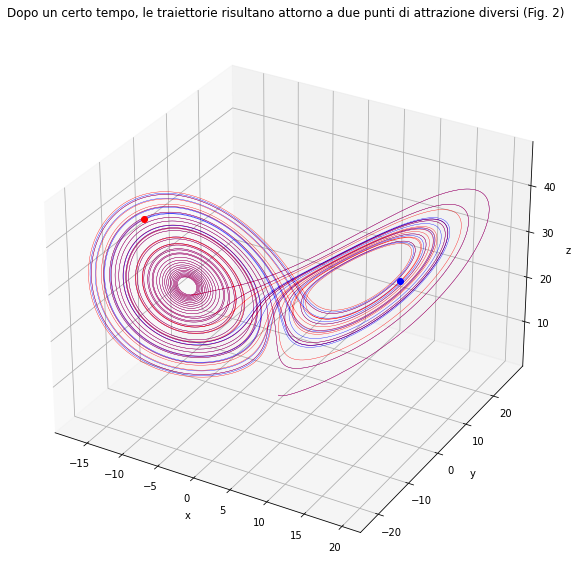

In [20]:
#1. IMPORTAZIONE LIBRERIE
import numpy as np
import matplotlib.pyplot as plt

#2. DEFINIZIONE DELLA FUNZIONE CHE RESTITUISCE I VALORI DELLE DERIVATE PARZIALI
def lorenz_dp(x, y, z, s=10, r=28, b=2.667):
    '''
    Dati:
        x, y, z: punto nello spazio tridimensionale
        s, r, b: parametri che definiscono l'attrattore
    Restituisce:
        x_dp, y_dp, z_dp: derivate parziali dell'attrattore al punto x, y, z
    '''
    
    x_dp = s*(y - x)
    y_dp = r*x - y - x*z
    z_dp = x*y - b*z
    return x_dp, y_dp, z_dp

#3. DEFINIZIONE DELL'INTERVALLO dt E DEL NUMERO DI REITERAZIONI DA FARE
dt = 0.001
steps_n = 35000

#4. DEFINIZIONE DELL'INSIEME DEI PUNTI CALCOLATI E VALORI INIZIALI
xs_1 = np.empty(steps_n + 1) #l'array contiene il valore calcolato in ogni passo e l'iniziale
ys_1 = np.empty(steps_n + 1)
zs_1 = np.empty(steps_n + 1)
xs_1[0], ys_1[0], zs_1[0] = (0., 1., 1.05)

xs_2 = np.empty(steps_n + 1)
ys_2 = np.empty(steps_n + 1)
zs_2 = np.empty(steps_n + 1)
xs_2[0], ys_2[0], zs_2[0] = (0., 1., 1.0500001)

#5. CALCOLO VALORI PUNTO SUCCESSIVO ATTRAVERSO LE DERIVATE
for i in range(steps_n):
    x_dp_1, y_dp_1, z_dp_1 = lorenz_dp(xs_1[i], ys_1[i], zs_1[i])
    xs_1[i + 1] = xs_1[i] + (x_dp_1*dt)
    ys_1[i + 1] = ys_1[i] + (y_dp_1*dt)
    zs_1[i + 1] = zs_1[i] + (z_dp_1*dt)

    x_dp_2, y_dp_2, z_dp_2 = lorenz_dp(xs_2[i], ys_2[i], zs_2[i])
    xs_2[i + 1] = xs_2[i] + (x_dp_2*dt)
    ys_2[i + 1] = ys_2[i] + (y_dp_2*dt)
    zs_2[i + 1] = zs_2[i] + (z_dp_2*dt)

#6. GRAFICO DEI VALORI
fig = plt.figure(figsize=[10,10])
ax = fig.gca(projection='3d')

ax.plot(xs_1, ys_1, zs_1, linewidth=0.35, color="blue")
ax.plot(xs_2, ys_2, zs_2, linewidth=0.35, color="red")
ax.plot(xs_1[steps_n], ys_1[steps_n], zs_1[steps_n], 'ro', color="blue")
ax.plot(xs_2[steps_n], ys_2[steps_n], zs_2[steps_n], 'ro', color="red")
ax.set_xlabel("x")
ax.set_ylabel("y")
ax.set_zlabel("z")
ax.set_title("Dopo un certo tempo, le traiettorie risultano attorno a due punti di attrazione diversi (Fig. 2)")

Segue un'implementazione Python del sistema di Lorenz interattiva, in cui possono essere variati i parametri: angolo di visualizzazione, istante finale di simulazione (ultimo step), $\sigma, \beta, \rho$. si può osservare quindi la variazione del comportamento del sistema al variare dei parametri:

In [23]:
#1. IMPORTAZIONE LIBRERIE NECESSARIE
from ipywidgets import interact, interactive
from IPython.display import clear_output, display, HTML

import numpy as np
from scipy import integrate

from matplotlib import pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from matplotlib.colors import cnames
from matplotlib import animation

#2. DEFINIZIONE FUNZIONI DI RISOLUZIONE DEL SISTEMA
def solve_lorenz(N=2, angle=0., max_time=4., sigma=10., beta=8./3, rho=28.) :
    fig1 = plt.figure(figsize=[10,10])
    ax = fig1.add_axes([0, 0, 1, 1], projection='3d')
    ax.axis('off')

    #2.1 DEFINZIONE LIMITI DEGLI ASSI
    ax.set_xlim((-25, 25))
    ax.set_ylim((-35, 35))
    ax.set_zlim((5, 55))

    #2.2 DEFINZIONE DELLA FUNZIONE CHE CALCOLA LE DERIVATE
    def lorenz_der(x_y_z, t0, sigma=sigma, beta=beta, rho=rho) :
        '''Calcolo delle derivate temporali del sistema di Lorenz'''
        x, y, z = x_y_z
        return [sigma * (y - x), x * (rho - z) - y, x * y - beta * z]
    
    #2.3 SCELTA DEI VALORI INIZIALI
    x0 = ((0., 1., 1.05), (0., 1., 1.0500001))

    #2.4 RISOLUZIONE PER TRAIETTORIE
    t = np.linspace(0, max_time, int(250*max_time))
    x_t = np.asarray([integrate.odeint(lorenz_der, x0i, t) for x0i in x0])

    #2.5 SCELTA DI DIFFERENTE COLORE DELLA TRAIETTORIA PER CIASCUNA
    colors = ['blue', 'red']

#2.6 CREA E COLORA PLOT PER OGNI TRAIETTORIA
    for i in range(N):
        x, y, z = x_t[i,:,:].T
        lines = ax.plot(x, y, z, '-', c=colors[i])
        plt.setp(lines, linewidth=0.35)
        dots = ax.plot(x[len(x) - 1], y[len(y) - 1], z[len(z) - 1], 'ro', c=colors[i])

    ax.view_init(30, angle)
    plt.show()

    return t, x_t

#3. CREAZIONE DELL'AMBIENTE INTERATTIVO
w = interactive(solve_lorenz, N=(1,2), angle=(0., 360.), max_time=(0.1, 100.0), sigma=(0., 50.), rho=(0., 50.))
display(w)

interactive(children=(IntSlider(value=2, description='N', max=2, min=1), FloatSlider(value=0.0, description='a…

## Cenni su dimensione frattale ed esponenti di Lyapunov
Ci sono due grandezze associate con quantità misurabili usate per caratterizzare gli attrattori strani:
<li> La sensibilità alle condizioni iniziali, quantificata dall'esponente di Lyapunov
<li> La ripetitività degli attrattori, quantificata dalla dimensione frattale

Gli esponenti di Lyapunov *(Def. 13)* quantificano la sensibilità del sistema alle condizioni iniziali misurando la velocità di allontanamento di due traiettorie infinitesismamente vicine in un punto dello spazio delle fasi ad un tempo abbastanza lungo. Se l'esponente $\lambda$ è positivo, il sistema presenta una dipendenza sensibile ai dati iniziali di tipo esponenziale, questo è quindi un sistema caotico. Cercando l'istante di tempo in cui il sistema diventa caotico si trova che corrisponde al reciproco di $\lambda$, detto tempo caratteristico o di Lyapunov del sistema. Dopo questo istante il sistema non risulta più predicibile.<br/>
Considerando lo spazio delle fasi di un attrattore tridimensionale, ci sono 3 esponenti di Lyapunov. I loro segni corrispondono al tipo di attrattore:
<li> Nel caso di un punto fisso, tutti e tre gli esponenti sono negativi,
<li> Nel caso di un ciclo limite con una sola frequenza ci sono due esponenti negativi e il terzo è nullo, che corrisponde alla direzione del flusso che non può essere né in contrazione, né in espansione.
<li> Se l'attrattore è strano: l'esponente maggiore è per definizione positivo; l'esponente nullo corrisponde alla direzione del flusso e l'esponente negativo deve essere di ordini di grandezza maggiore rispetto a quello positivo perché il volume deve essere in contrazione.

La dimensione frattale *(Def. 12)*, invece, può essere associata con l'effettivo numero di gradi di libertà che sono "amplificati" dalle dinamiche, come per esempio numero di variabili indipendenti, numero di modalità di oscillazione o numero di picchi nello spettro della potenza. <br/>
I frattali sono insiemi la cui dimensione di Hausdorff è strettamente maggiore di quella topologica. Questo accade poiché la dimensione frattale conta non solo la dimensione topologica ma anche quanto spazio occupa la figura. In questo caso, i frattali occupano più spazio di quanto sia la loro dimensione topologica, nello specifico la dimensione frattale dell'attrattore di Lorenz vale $D\approx 2.0627$ *(Viswanath, 2004)*.

## Qualche definizione
### Def. 1 - Spazio delle fasi
In un sistema che consiste in $n$ equazioni differenziali ordinarie del primo ordine, lo spazio di dimensione $2n$ che consiste in tutti e soli i possibili valori          di $(x_1, \dot{x}_1, x_2, \dot{x}_2, ..., x_n, \dot{x}_n)$ è noto come spazio delle fasi.
### Def. 2 - Punto fisso
Un punto fisso è un punto che non cambia se si applica su di esso una funzione o, per esempio, un sistema di equazioni differenziali. In particolare, un punto fisso per una funzione $f(x)$ è un punto $x_0$ tale che $$f(x_0)=x_0$$
*Osservazione 2.1:*<br />
Se una variabile viene spostata anche di poco da un punto fisso può:
<ol> 
<li>tornare indietro al punto fisso, in questo caso si dice asintoticamente stabile,
<li>allontanarsi, in questo caso il comportamento è detto instabile,
<li>avvicinarsi ad un punto fisso ma non arrivarci, comportamento stabile (non asintoticamente).
</ol>

In ogni caso, se una variabile parte da un punto che non è un punto fisso, non potrà mai raggiungerlo in un tempo finito e una traiettoria che passi in almeno in un punto non fisso non si può incrociare a meno che non sia una curva chiusa, rendendola una soluzione periodica.<br />

### Def. 3 - Attrattore
In un sistema dinamico, l'attrattore $\Lambda$ è un sottoinsieme dello spazio delle fasi tale che:<br/>
Esiste un suo intorno, detto bacino di attrazione, che converge a qualunque insieme aperto che contiene l'attrattore, $f(t, \Lambda)\in\Lambda$ per $t$ sufficientemente grande.<br/>
Un attrattore è un insieme di stati (o punti nello spazio delle fasi) che risultano invarianti rispetto alla dinamica. Gli stati vicini in un certo bacino di attrazione si avvicinano asintoticamente all'attrattore durante l'evoluzione dinamica del sistema. <br />
Un attrattore è definito come unità minima che non può essere suddiviso in due o più attrattori con diversi bacini di attrazione. Ciò risulta necessario in quanto un sistema dinamico può avere più attrattori, ciascuno con il suo bacino di attrazione. I sistemi conservativi non presentano attrattori, dato che il loro moto è periodico. <br/>

### Def. 4 - Attrattore Strano
Un insieme attraente che abbia misura nulla nel corrispondente spazio delle fasi e dimensione frattale si dice attrattore strano. Le traiettorie in questo tipo di attrattore sembrano procedere casualmente.<br/>
Un attrattore strano denota solitamente un comportamento caotico del sistema, anche se esistono attrattori strani non caotici. Nel caso di comportamento caotico il sistema presenta una altissima dipendenza dalle condizioni iniziali, infatti scelti due punti arbitrariamente vicini all'attrattore dopo un certo numero di iterazioni essi risulteranno arbitrariamente distanti nei limiti dell'estensione dell'attrattore. Infine, dopo un altro numero di iterazioni torneranno arbitrariamente vicini.<br/>
Un sistema dinamico con attrattore caotico è quindi localmente instabile ma globalmente stabile: nel momento in cui i punti entrano nell'attrattore divergono l'uno dall'altro ma non escono mai dall'attrattore stesso.<br/>
### Def. 5 - Funzione di Ljapunov
Dato un sistema dinamico: $$\dot{x} = f(x, t), \qquad x=(x_1, ..., x_n)\in\mathbb{R}^n$$ sia $x_0$ un punto fisso: $$f(x_0, t)=0$$ dove si è supposta $f:U\times\mathbb{R}^+\rightarrow\mathbb{R}^n$, definita in un intorno $U$ di $x_0\in\mathbb{R}^n$, una funzione continua e differenziabile con continuità rispetto a $x$.<br/>
Una funzione scalare $V:U\rightarrow\mathbb{R}$ è detta funzione di Ljapunov se: $$V(x)>0, \quad x\ne x_0$$ $$V(x_0)=0$$ $$\nabla V(x)\bullet f(x)=\frac{\partial}{\partial x_1}V(x)f_1(x)+...+\frac{\partial}{\partial x_n}V(x)f_n(x)\leq0$$
Il lemma di Ljapunov stabilisce che se esiste una funzione $V$, allora il punto di equilibrio $x_0$ è stabile secondo Ljapunov.<br/>
### Def. 6 - Biforcazione di Hopf
La comparsa o scomparsa di un'orbita periodica dovuta ad un cambiamento locale nella proprietà di stabilità di un punto fisso è conosciuta come biforcazione di Hopf. Il seguente Teorema 6.1 enuncia le condizioni sotto le quali accade questo fenomeno:
#### $\quad$ Teorema 6.1 (di Hopf)
$\qquad$Sia $\dot{x}=f(x, \mu)$ un sistema di dimensione $n\geq 2$ e sia $(x_0, \mu_0)$ un punto tale che:
<li> $f(x_0, \mu_0)=0$
<li> Lo Jacobiano $J_f(x_0, \mu_0)$ ha una coppia di autovalori immaginari puri $\lambda_{1,2}=\pm i\beta$ e nessun altro autovalore con parte reale nulla.
<li> Vale la *condizione di attraversamento*: $$\left[\frac{d Re(\lambda_{1,2})}{d\mu}\right]_{\mu=\mu_0} \ne 0$$

Allora in $(x_0, y_0)$ si genera una soluzione periodica, conosciuta come ciclo limite, con ampiezza iniziale nulla e periodo $\frac{2\pi}{\beta}$. Il punto $(x_0, \mu_0)$ viene dunque detto **biforcazione di Hopf**.<br/>
*Osservazione 6.1:*<br/>
La terza condizione richiede che gli autovalori $\lambda_{1,2}$ attraversino l'asse immaginario. Corrisponde a richiedere che la parte reale degli autovalori vari al variare di $\mu$, almeno nel valore $\mu=\mu_0$.<br/>
Una biforcazione di Hopf può essere supercritica o subcritica, nel primo caso $\forall\mu\ne\mu_0$ esiste un attrattore stabile. Nel secondo, i cicli si formano per $\mu<0$ e sono non attrattivi e l'equilibrio è instabile per $\mu>0$.<br/>
### Def. 7 - Orbita omoclina
Si consideri un sistema dinamico continuo descritto dall'equazione differenziale $\dot{x}=f(x)$.<br/> Supponendo che ci sia un punto di equilibrio in $x=x_0$, allora una soluzione $\Phi(t)$ è un'orbita omoclina se: <br/>
$$\phi(t)\rightarrow x_0, \qquad se\quad t\rightarrow\pm\infty$$
L'orbita omoclina è l'orbita che si trova all'intersezione della varietà stabile e instabile di un punto di equilibrio.<br/>
### Def. 8 - Gruppo
Un gruppo è un insieme $G$ dotato di un'operazione binaria $*$, che ad ogni coppia di elementi $a,b\in G$ associa un elemento $a*b\in G$ per cui siano soddisfatti gli assiomi di: proprietà associativa di $*$, esistenza di elemento neutro ed inverso.<br/>
### Def. 9 - Azione di gruppo
Siano $G$ un gruppo ed $A$ un insieme. Si dice azione di gruppo una funzione: $$G\times A\longrightarrow A, \qquad (g,a)\longmapsto g\bullet a$$
dove $\bullet$ è definita in modo che:<br/>
<li>$1_G\bullet a=a\quad \forall a\in A$<br/>
<li>$g\bullet (h\bullet a)=(gh)\bullet a\quad \forall g,h\in G, \quad a\in A$<br/>

### Def. 10 - Orbita
Dato un insieme dinamico $(T, M, \Phi)$ dove $T$ è un gruppo, $M$ un insieme e $\Phi:U\rightarrow M$, con $U\subset T\times M$, si definisce: $$I(x) := \{t\in T:(t,x)\in U\}$$
Allora l'insieme: $$\gamma_x :=\{\Phi(t,x):t\in I(x)\}\subset M$$
è l'orbita passante per $x$. Se l'orbita consiste in un solo punto allora si dice orbita costante, come per esempio l'orbita in corrispondenza di un punto di equilibrio. <br/>
Un'orbita non costante è detta periodica o chiusa se esiste $t\in T$ tale che $\Phi(t, x)=x$ per ogni punto $x$ dell'orbita.<br/>
Meno formalmente, un'orbita di un sistema dinamico è una traiettori percorsa dal sistema nello spazio delle fasi, rappresentata da una funzione che soddisfa l'equazione che definisce il sistema dinamico stesso.<br/>
### Def. 11 - Flusso
Un flusso su un insieme $X$ è un'azione di gruppo di un gruppo additivo dei numeri reali su $X$. Più esplicitamente, un flusso è un funzione $$\varphi:X\times \mathbb{R}\rightarrow X$$
tale che, per ogni elemento $x\in X$ e per ogni numero reale $s$ e $t$:
$$\varphi(x,0)=x,\qquad \varphi(\varphi(x,t),s)=\varphi(x,s+t)$$
Un esempio di flusso sono le soluzioni di un'equazione differenziale ordinaria autonoma, usata per descrivere un sistema dinamico: $$y'=f(y)\qquad y(t=0)=x_0$$
dove il flusso $\psi_t (x_0)$ corrispondente all'orbita per il punto iniziale $x_0$ è l'unica soluzione al problema ai valori iniziali dato.<br/>
### Def. 12 - Dimensione frattale (o dimensione di Hausdorf)
Considerando un attrattore $A$ formato da un insieme di punti in uno spazio $p$-dimensionale, ciascun punto è contenuto in un ipercubo di lato $\epsilon$; sia $N(\epsilon)$ il numero minimo di cubi per ricoprire $A$. Allora, se $N(\epsilon)=C\epsilon^{-D}$ con $\epsilon\rightarrow 0$ e $C$ costante, $D$ è chiamata la dimensione frattale o di Hausdrorf del sistema. La cui definizione formale è:
$$D=\lim_{\epsilon\to 0} \frac{\ln\left(N(\epsilon)\right)}{\ln\left(1/\epsilon\right)}$$

### Def. 13 Esponente di Lyapunov
L'esponente di Lyapunov in un punto nello spazio delle fasi è un valore che quantifica la velocità di allontanamento di due traiettorie infinitesimamente vicine.<br/>
Ad un punto dello spazio delle fasi sono associati un numero di esponenti di Lyapunov pari alla dimensione dello spazio. Se l'esponente di Lyapunov massimo è $\lambda$ e se la distanza $\delta Z_0$ tra le orbite è abbastanza piccola, allora il vettore $\delta Z_0$ ha un'evoluzione nel tempo (la velocità di separazione delle orbite) che per tempi $t$ grandi è approssimata da: $$\mid{\delta Z(t)}\mid \approx Ce^{\lambda t}\mid{\delta Z_0}\mid$$
Più formalmente:<br/>
Per una funzione $f : \mathbb{R}^m\longmapsto \mathbb{R}^m$ differenziabile  ed una sua orbita si possono definire $m$ esponenti di Lyapunov $\lambda_1, ..., \lambda_m$ che misurano la velocità dell'orbita in $m$ direzioni ortogonali in modo che lungo la direzione $i$-esima i punti evolveranno come $\delta_0 e^{\lambda_i n}$ per $n$ sufficientemente grandi. Le direzioni sono ordinate in modo decrescente dalla loro velocità di separazione. Nelle direzioni che sono combinazioni lineari di due direzioni associate ad esponenti di Lyapunov diversi, la velocità di separazione è stabilita dell'esponente maggiore.

Considerando l'intera traiettoria, si definisce l'esponente di Lyapunov di $x_0$ nella direazione $\nu$ come il tasso di crescita esponenziale medio nel seguente modo: $$\lambda(x_0, \nu) := \lim_{n\to 0} \left(\frac{1}{n}\log\left\| DF^n(x_0)\nu\right\| \right)$$
Da questa definizione si deduce che se il vettore congiungente ha la direzione $\nu$, allora la distanza $\left\|x-x_0\right\|$ evolve come $Ce^{n\lambda(x_0, \nu)}$ per $n$ grandi.

## Appendice 1 - Problema fisico e ricavo del sistema di equazioni
### Introduzione al problema fisico
<img src="tubo convezione.png" width="211" height="200" style="float:left"> Consideriamo la convezione in un anello o toroide orientato ad asse orizzontale e ci aspettiamo tre possibili flussi:
<li>Conduzione stabile pura (senza movimento del fluido)
<li>Circolazione costante
<li>Instabilità (circolazione non costante)
<img src="tubo convezione adv.png" width="280" height="220" style="float:right">

<br/>Sulla destra è rappresentata la situazione precisa, con la direzione dell'asse $z$, i vari $\Delta T$ e la parametrizzazione della posizione $\phi$ sulla sezione del toroide.

La temperatura esterna $T_E$ varia linearmente con l'altezza: $$T_E=T_0-T_1\frac{z}{a}=T_0+T_1 cos{\phi}$$
dove $a$ è il raggio dell'anello. Assumo che il raggio interno del tubo sia molto più piccolo di $a$. Le quantità misurabili dentro il tubo vengono mediate in sezione trasversale:
$$q=q(\phi, t)\qquad T=T(\phi,t)$$ dove $q$ è la velocità e $T$ è la temperatura interna.<br/>
Introduco l'approssimazione di Boussinesq, instesa come incomprimibilità: $$\frac{\partial\rho}{\partial t}=0$$ Per la conservazione della massa ho:$$\frac{\partial q}{\partial\phi}=0$$ Quindi, i moti all'interno dell'anello sono equivalenti a una specie di rotazione di un corpo solido dove $q=q(t)$. La temperatura $T(\phi)$ può variare con molta più complessità, in questo caso assumiamo dipenda solo da due parametri $T_2$ e $T_3$ secondo la:
$$T-T_0=T_2 cos{\phi}+T_3 sin{\phi}\tag{A1.1}$$
Quindi, la differenza di temperatura è $2T_2$ tra l'estremo superiore e quello inferiore dell'apparato, mentre è $2T_3$ è la differenza tra i due estremi laterali. Anche $T_2$ e $T_3$ variano con il tempo.

### Equazioni del moto
#### Quantità di moto
Uso l'equzione di Navier-Stokes per la convezione: $$\frac{\partial\vec{u}}{\partial t}+\vec{u}\cdot\nabla\vec{u}=-\frac{1}{\rho}\nabla p-\vec{g}\alpha\Delta T+\nu\nabla^2\vec{u}$$
sostituiamo i termini con il setup sperimentale:
<li> $\vec{u}\rightarrow q$
<li> $\vec{u}\cdot\nabla\vec{u}\rightarrow 0$ per la conservazione della massa
<li> $\nabla p\rightarrow \frac{1}{a} \frac{\partial p}{\partial \phi}$
<li> La galleggiabilità $F=g\alpha(T-T_0)$ viene moltiplicato per $sin{\phi}$ per avere la componente tangenziale, il segno è concorde al moto del fluido
<li> $\Gamma$ è un coefficiente d'attrito generalizzato, che corrisponde alla resistenza viscosa (proporzionale alla velocità)

Ottengo quindi:
$$\frac{\partial q}{\partial t}=-\frac{1}{\rho a}\frac{\partial p}{\partial\phi}+g\alpha(T-T_0)\sin{\phi}-\Gamma q\tag{A1.2}$$
Ora sostituiamo l'equazione $(A1.1)$ nella $(A1.2)$ e arrivo a:
$$\frac{\partial q}{\partial t} = -\frac{1}{\rho a}\frac{\partial p}{\partial \phi}+g\alpha(T_2 \cos{\phi}+T_3 \sin{\phi})\sin{\phi}-\Gamma q$$
Gli integrali sono facilmente calcolati:
$$\int_0^{2\pi}{\cos{\phi}\sin{\phi}d\phi}=0\qquad\int_0^{2\pi}{\sin^2{\phi}d\phi}=\pi$$
Dopo aver diviso il risultato per $2\pi$, l'equazione della quantità di moto diventa: $$\frac{dq}{dt}=-\Gamma q+\frac{g\alpha T_3}{2}\tag{A1.3}$$
dove il differenziale non è più parziale visto che $\partial q/\partial\phi=0$. Dalla $(A1.3)$ si evince che il moto avviene grazie alla differenza di temperatura orizzontale $2T_3$.
#### Equazione della temperatura
Dobbiamo trovare ora un'equazione che descriva i cambiamenti di temperatura. L'equazione completa è: $$\frac{\partial T}{\partial t}+\vec{u}\cdot\nabla T=\kappa\nabla^2 T$$dove $\kappa$ è la diffusività termica. Si può approssimare l'equazione della temperatura considerando solo le medie in sezione trasversale: $$\frac{\partial T}{\partial t}+\frac{q}{a}\frac{\partial T}{\partial\phi}=K(T_E-T)\tag{A1.4}$$
per la quale sono state assunte vere le seguenti ipotesi:
<li> Il secondo membro dell'equazione ipotizza che il calore sia trasferito attraverso le pareti con velocità $K(T_E-T_I)$ dove $T_E$ è la temperatura esterna e $T_I$ quella interna.
<li> La conduzione lungo l'anello è trascurabile e quindi non avremo il termine $\nabla^2 T$.

Anche la temperatura esterna $T_E$ varia linearmente con l'altezza: $$T_E=T_0+T_1 \cos{\phi}\qquad T-T_0=T_2\cos{\phi}+T_3\sin{\phi}$$
sottraendo la seconda dalla prima ottengo: $$T_E-T=(T_1-T_2)\cos{\phi}-T_3\sin{\phi}$$
sostituisco questo risultato nella $(A1.4)$: 
$$\frac{dT_2}{dt}\cos{\phi}+\frac{dT_3}{dt}\sin{\phi}-\frac{q}{a}T_2\sin{\phi}+\frac{q}{a}T_3\cos{\phi}=K(T_1-T_2)\cos{\phi}-KT_3\sin{\phi}$$
in questa ultima equazione tutte le derivate parziali di $T$ sono diventate totali dato che $T_2$ e $T_1$ dipendono solamente dal tempo.

Dato che l'equazione della temperatura deve essere valida per ogni $\phi$, possiamo separare i termini in $\cos{\phi}$ e $\sin{\phi}$ ottenendo:
$$\sin{\phi} :\quad \frac{dT_3}{dt}-\frac{qT_2}{a}=-KT_3$$ $$\cos{\phi} : \quad \frac{dT_2}{dt}+\frac{qT_3}{a}=K(T_1-T_2)$$
Queste due equazioni insieme alla $(A1.3)$, equazione della quantità di moto, sono le tre equazioni differenziali ordinarie che governano le dinamiche del sistema.

Procedimo ora semplificando, definisco: $$T_4 (t)=T_1-T_2(t)$$ che è la differenza tra temperature interna ed esterna in cima e sotto l'anello (considerabile anche come un grado di distanza da un "equilibrio conduttivo"), sostituendo:
$$\frac{dT_3}{dt}=-KT_3+\frac{qT_1}{a}-\frac{qT_4}{a}$$ $$\frac{dT_4}{dt}=-KT_4+\frac{qT_3}{a}$$
### Equazioni adimensionali
Definisco le variabili adimensionali come:
$$x=\frac{q}{aK},\qquad y=\frac{g\alpha T_3}{2a\Gamma K},\qquad z=\frac{g\alpha T_4}{2a\Gamma K}$$
Dove, x rappresenta la velocità, y rappresenta la differenza di temperatura tra le correnti ascendenti e discendenti e z rappresenta la distanza dell'equilibrio conduttivo. Infine, applico una piccola sostituzione al tempo, rendendolo adimensionale: $$t'=tK$$
Tralasciando l'apice sulla $t$ ottengo:
$$\frac{dx}{dt}=-\sigma x+\sigma y$$ $$\frac{dy}{dt}=-y+\rho x-xz$$ $$\frac{dz}{dt}=-z+xy$$
dove i parametri adimensionali sono $\rho$ il numero di Rayleigh e $\sigma$ il numero di Prandtl, definiti come: $$\rho=\frac{g\alpha T_1}{2a\Gamma K}, \qquad \sigma=\frac{\Gamma}{K}$$

Queste tre equazioni sono praticamente le stesse del sistema di Lorenz che stiamo trattando, con una piccola differenza. Si può notare la mancanza del fattore $\beta$ nell'ultima equazione. Questo parametro è legato al numero di onda orizzontale dei moti convettivi.